# Import Modules

In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.io import loadmat
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dpc_algorithm import DPCSolver

# Load DPC Measurements

In [2]:
from tkinter import filedialog, Tk
import numpy as np
from skimage import io

def LoadImagetoNumpy(initialdir = "./", \
                     DialogueTitle = "Select image to load" , \
                     isColour = False):                                
#Initiates the file dialogue to load
#an image file, should be done in the
#order of bottom, top, left, right.

    root = Tk()
    root.withdraw()                                                    #for annoying popup
    ImageToLoad = filedialog.askopenfilename(parent = root, \
                                             title = DialogueTitle)    #Defines the chosen image as 'ImageToLoad'
    root.quit()
    
    im = io.imread(ImageToLoad, as_gray = True)                        #Converts image to grey scale and displays shape
    print('im size is' + str(im.shape))
    
    return np.array(im)                                                #Returns a 2D numpy array for the image

In [3]:
imagestack = np.zeros((4, 1216, 1936))
imagestack[0, :, :], imagestack[1, :, :] = LoadImagetoNumpy(r"C:\Users\jackm\OneDrive\Desktop\Image sets 2nd December\TestImages(imgset3)", "Bottom image"),\
LoadImagetoNumpy(r"C:\Users\jackm\OneDrive\Desktop\Image sets 2nd December\TestImages(imgset3)", "Top image")                                                       
imagestack[2, :, :], imagestack[3, :, :] = LoadImagetoNumpy(r"C:\Users\jackm\OneDrive\Desktop\Image sets 2nd December\TestImages(imgset3)", "left image"),\
LoadImagetoNumpy(r"C:\Users\jackm\OneDrive\Desktop\Image sets 2nd December\TestImages(imgset3)", "right image")                                                     
#1st line Loads image to the 1st row, should be the bottom illuminated image.
#2nd line Loads image to the 2nd row, should be the top illuminated image.
#3rd line Loads image to the 3rd row, should be the left illuminated image.
#4th line Loads image to the 4th row, should be the right illuminated image.

dpc_images = imagestack                                                                                                  #Renames the image stack to dpc images for use in the pre-existing
                                                                                                                         #section of the code authored by Laura Waller's group
bottom, top, left, right = imagestack[0, :, :], imagestack[1, :, :], imagestack[2, :, :], imagestack[3, :, :]

im size is(1216, 1936)
im size is(1216, 1936)
im size is(1216, 1936)
im size is(1216, 1936)


# 2014 DPC images

In [4]:
def DPC2014(img1, img2):                        #Defines a function for the DPC imaging style of the paper authored in 2014 by Laura Waller's group.
    tot = np.add(img1, img2)                    #Takes two 2D numpy arrays as image files. First adds them for a total image
    diff = np.subtract(img1, img2)              #Calculates the difference between the two images
    DPC = np.divide(diff, tot)                  #Divides the difference by the total and returns a DPC image
    return DPC

print(np.shape(DPC2014(top, bottom)))           #Prints the shape of the resulting DPC image to check against the original image sizes

(1216, 1936)


Text(0.5, 1.0, 'Left and right DPC image')

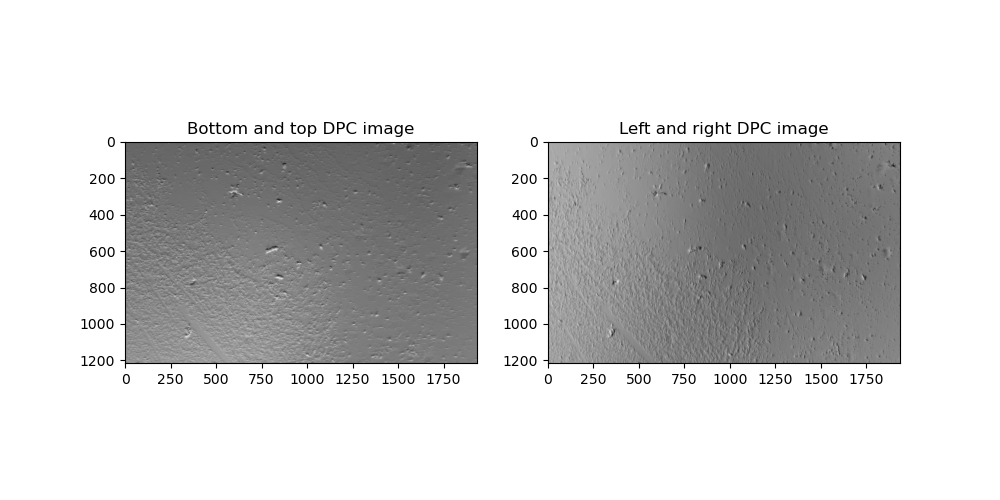

In [5]:
topbot = DPC2014(top, bottom)
leftright = DPC2014(left, right)

Figure, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))          #Plot the DPC images for top+bottom and left+right
ax1.imshow(topbot, cmap = 'gray', aspect='equal')                #cmap='gray' converts to greyscale while aspect='equal' is important to 
ax1.set_title('Bottom and top DPC image')                                      #retain information and avoid distortion
ax2.imshow(leftright, cmap = 'gray', aspect='equal')
ax2.set_title('Left and right DPC image')

# 2015 DPC images

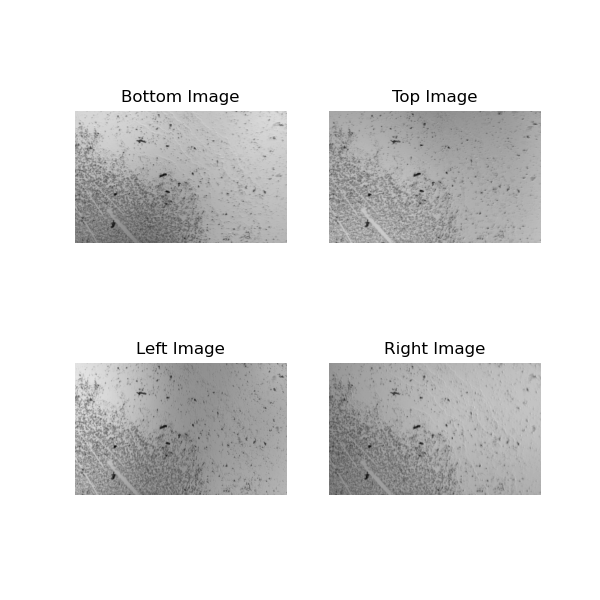

In [6]:
#plot first set of measured DPC measurements
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6))
for plot_index in range(4):
    plot_row = plot_index//2
    plot_col = np.mod(plot_index, 2)
    ax[plot_row, plot_col].imshow(dpc_images[plot_index], cmap="gray",\
                                  extent=[0, dpc_images[0].shape[-1], 0, dpc_images[0].shape[-2]])
    ax[plot_row, plot_col].axis("off")
    ax[0, 0].set_title("Bottom Image")
    ax[0, 1].set_title("Top Image")
    ax[1, 0].set_title("Left Image")
    ax[1, 1].set_title("Right Image")

# Set System Parameters

In [7]:
wavelength     =  0.475 #micron
mag            =   9.8
na             =   0.30 #numerical aperture
na_in          =    0.0
pixel_size_cam =    5.86 #pixel size of camera
dpc_num        =      4 #number of DPC images captured for each absorption and phase frame
pixel_size     = pixel_size_cam/mag
rotation       = [0, 180, 90, 270] #degree

# DPC Absorption and Phase Retrieval

## Initialize DPC Solver

In [8]:
dpc_solver_obj = DPCSolver(dpc_images, wavelength, na, na_in, pixel_size, rotation, dpc_num=dpc_num)

## Visualize Source Patterns 

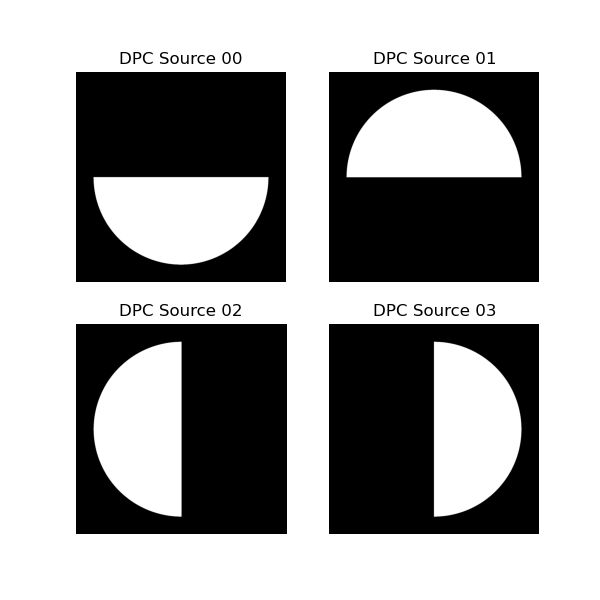

In [9]:
#plot the sources
max_na_x = max(dpc_solver_obj.fxlin.real*dpc_solver_obj.wavelength/dpc_solver_obj.na)
min_na_x = min(dpc_solver_obj.fxlin.real*dpc_solver_obj.wavelength/dpc_solver_obj.na)
max_na_y = max(dpc_solver_obj.fylin.real*dpc_solver_obj.wavelength/dpc_solver_obj.na)
min_na_y = min(dpc_solver_obj.fylin.real*dpc_solver_obj.wavelength/dpc_solver_obj.na)
f, ax  = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6))
for plot_index, source in enumerate(list(dpc_solver_obj.source)):
    plot_row = plot_index//2
    plot_col = np.mod(plot_index, 2)
    ax[plot_row, plot_col].imshow(np.fft.fftshift(dpc_solver_obj.source[plot_index]),\
                                  cmap='gray', clim=(0,1), extent=[min_na_x, max_na_x, min_na_y, max_na_y])
    ax[plot_row, plot_col].axis("off")
    ax[plot_row, plot_col].set_title("DPC Source {:02d}".format(plot_index))
    ax[plot_row, plot_col].set_xlim(-1.2, 1.2)
    ax[plot_row, plot_col].set_ylim(-1.2, 1.2)
    ax[plot_row, plot_col].set_aspect(1)

## Visualize Weak Object Transfer Functions

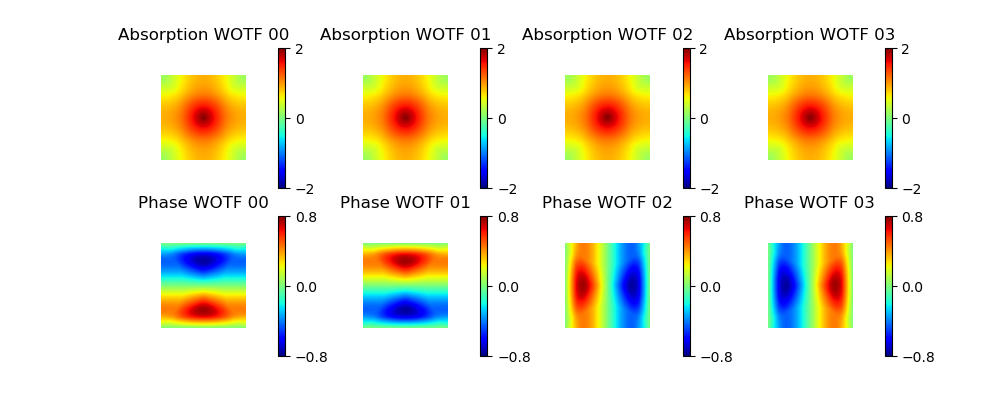

In [10]:
#plot the transfer functions
f, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize = (10, 4))
for plot_index in range(ax.size):
    plot_row = plot_index//4
    plot_col = np.mod(plot_index, 4)
    divider  = make_axes_locatable(ax[plot_row, plot_col])
    cax      = divider.append_axes("right", size="5%", pad=0.05)
    if plot_row == 0:
        plot = ax[plot_row, plot_col].imshow(np.fft.fftshift(dpc_solver_obj.Hu[plot_col].real), cmap='jet',\
                                             extent=[min_na_x, max_na_x, min_na_y, max_na_y], clim=[-2., 2.])
        ax[plot_row, plot_col].set_title("Absorption WOTF {:02d}".format(plot_col))
        plt.colorbar(plot, cax=cax, ticks=[-2., 0, 2.])
    else:
        plot = ax[plot_row, plot_col].imshow(np.fft.fftshift(dpc_solver_obj.Hp[plot_col].imag), cmap='jet',\
                                             extent=[min_na_x, max_na_x, min_na_y, max_na_y], clim=[-.8, .8])
        ax[plot_row, plot_col].set_title("Phase WOTF {:02d}".format(plot_col))
        plt.colorbar(plot, cax=cax, ticks=[-.8, 0, .8])
    ax[plot_row, plot_col].set_xlim(-2.2, 2.2)
    ax[plot_row, plot_col].set_ylim(-2.2, 2.2)
    ax[plot_row, plot_col].axis("off")
    ax[plot_row, plot_col].set_aspect(1)

## Solve DPC Deconvoltion Problems

### Tikhonov Regularization

In [11]:
#parameters for Tikhonov regurlarization [u:absorption, p:phase] ((need to tune this based on SNR)
dpc_solver_obj.setRegularizationParameters(reg_u = 1e-1, reg_p = 5e-3)
dpc_result = dpc_solver_obj.solve(method="Tikhonov")

Text(0.5, 1.0, 'Phase')

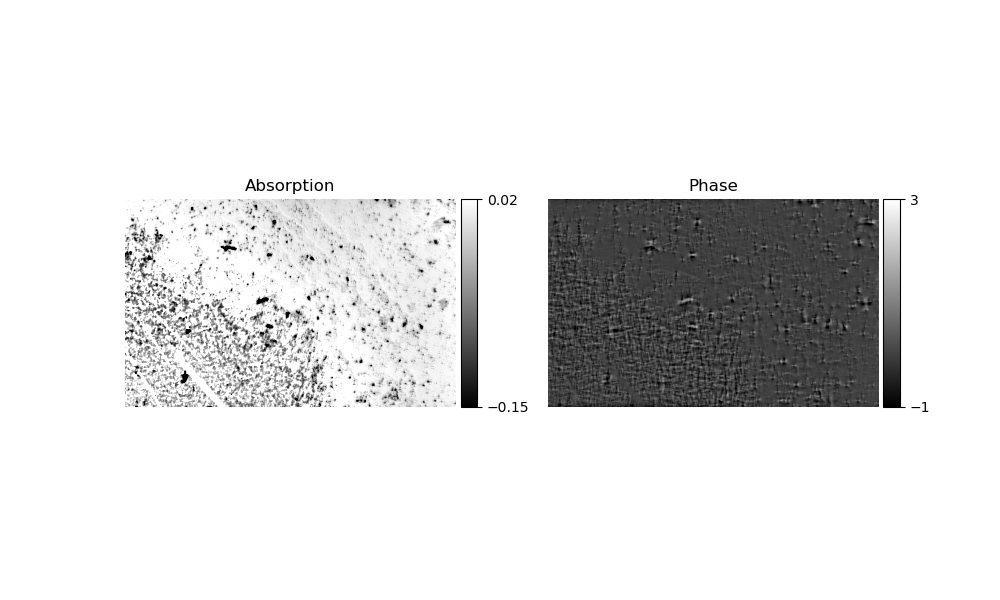

In [12]:
_, axes  = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
divider  = make_axes_locatable(axes[0])
cax_1    = divider.append_axes("right", size="5%", pad=0.05)
plot     = axes[0].imshow(dpc_result[0].real, clim=[-0.15, 0.02], cmap="gray", extent=[0, dpc_result[0].shape[-1], 0, dpc_result[0].shape[-2]])
axes[0].axis("off")
plt.colorbar(plot, cax=cax_1, ticks=[-0.15, 0.02])
axes[0].set_title("Absorption")
divider  = make_axes_locatable(axes[1])
cax_2    = divider.append_axes("right", size="5%", pad=0.05)
plot     = axes[1].imshow(dpc_result[0].imag, clim=[-1.0, 3.0], cmap="gray", extent=[0, dpc_result[0].shape[-1], 0, dpc_result[0].shape[-2]])
axes[1].axis("off")
plt.colorbar(plot, cax=cax_2, ticks=[-1.0, 3.0])
axes[1].set_title("Phase")

### TV Regularization

In [13]:
#parameters for TV regurlarization [u:absorption, p:phase] ((need to tune this based on your sample)
dpc_solver_obj.setRegularizationParameters(reg_u = 1e-1, reg_p = 5e-3, tau_u = 1.0, tau_p = 1.0, rho = 1.0)
dpc_result = dpc_solver_obj.solve(method="TV", tv_order=3, tv_max_iter=10)

Text(0.5, 1.0, 'Phase')

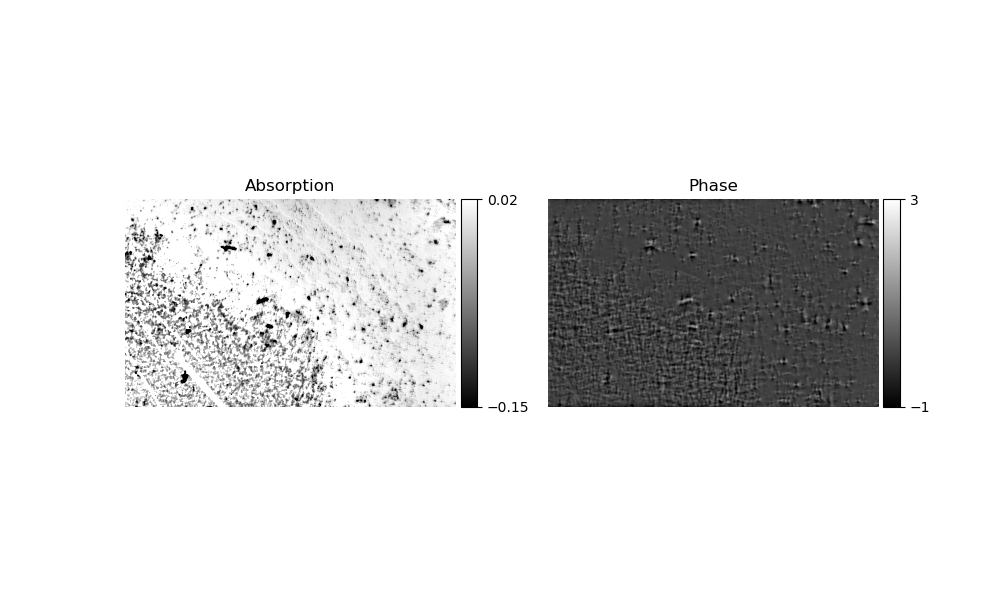

In [14]:
_, axes  = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
divider  = make_axes_locatable(axes[0])
cax_1    = divider.append_axes("right", size="5%", pad=0.05)
plot     = axes[0].imshow(dpc_result[0].real, clim=[-0.15, 0.02], cmap="gray", extent=[0, dpc_result[0].shape[-1], 0, dpc_result[0].shape[-2]])
axes[0].axis("off")
plt.colorbar(plot, cax=cax_1, ticks=[-0.15, 0.02])
axes[0].set_title("Absorption")
divider  = make_axes_locatable(axes[1])
cax_2    = divider.append_axes("right", size="5%", pad=0.05)
plot     = axes[1].imshow(dpc_result[0].imag, clim=[-1.0, 3.0], cmap="gray", extent=[0, dpc_result[0].shape[-1], 0, dpc_result[0].shape[-2]])
axes[1].axis("off")
plt.colorbar(plot, cax=cax_2, ticks=[-1.0, 3.0])
axes[1].set_title("Phase")